In [4]:
# load libraries

import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns


In [5]:
df = pd.read_csv("data/mm23.csv", skiprows = [1,2,3,4,5,6])

In [6]:
months = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

df2 = df[df.Title.str.contains('|'.join(months))]

In [7]:
df_arima = pd.DataFrame({'date': df2['Title'], 'CPIH': df2['CPIH INDEX 00: ALL ITEMS 2015=100']}).tail(50)

df_arima.head(50)

,date,CPIH
1392,2019 SEP,108.4
1393,2019 OCT,108.3
1394,2019 NOV,108.5
1395,2019 DEC,108.5
1396,2020 JAN,108.3
1397,2020 FEB,108.6
1398,2020 MAR,108.6
1399,2020 APR,108.6
1400,2020 MAY,108.6
1401,2020 JUN,108.8


c:\Users\Soki\OneDrive - University College London\21_Activities\Data_Science_Weekend\DS_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Soki\OneDrive - University College London\21_Activities\Data_Science_Weekend\DS_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Soki\OneDrive - University College London\21_Activities\Data_Science_Weekend\DS_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Soki\OneDrive - University College London\21_Activities\Data_Science_Weekend\DS_venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-statio

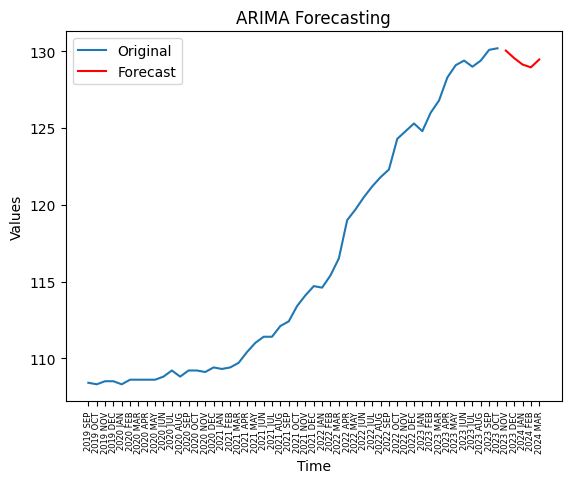

In [8]:
order = (10, 3, 4)  # Example order (p, d, q)
model = ARIMA(df_arima['CPIH'], order=order)
results = model.fit()

forecast_steps = 5  # Number of steps to forecast
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

future_values = ['2023 NOV', '2023 DEC', '2024 JAN', '2024 FEB', '2024 MAR']

plt.plot(df_arima['date'], df_arima['CPIH'], label='Original')
plt.plot(future_values, forecast_values, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('ARIMA Forecasting')
plt.xticks(rotation = 90, fontsize = 6)
plt.legend()
plt.show()


Correlation Matrix:
                                                    inflation %CPIH INDEX 00: ALL ITEMS 2015=100  \
inflation %CPIH INDEX 00: ALL ITEMS 2015=100                                            1.000000   
inflation %CPIH INDEX 01 : FOOD AND NON-ALCOHOL...                                      0.766157   
inflation %CPIH INDEX 02:ALCOHOLIC BEVERAGES,TO...                                      0.593209   
inflation %CPIH INDEX 03 : CLOTHING AND FOOTWEA...                                      0.622717   
inflation %CPIH INDEX 05 : FURN, HH EQUIP & ROU...                                      0.815690   
inflation %CPIH INDEX 06 : HEALTH 2015=100                                              0.669562   
inflation %CPIH INDEX 07 : TRANSPORT2015=100                                            0.572399   
inflation %CPIH INDEX 08 : COMMUNICATION 2015=100                                       0.465593   
inflation %CPIH INDEX 09 : RECREATION & CULTURE...                              

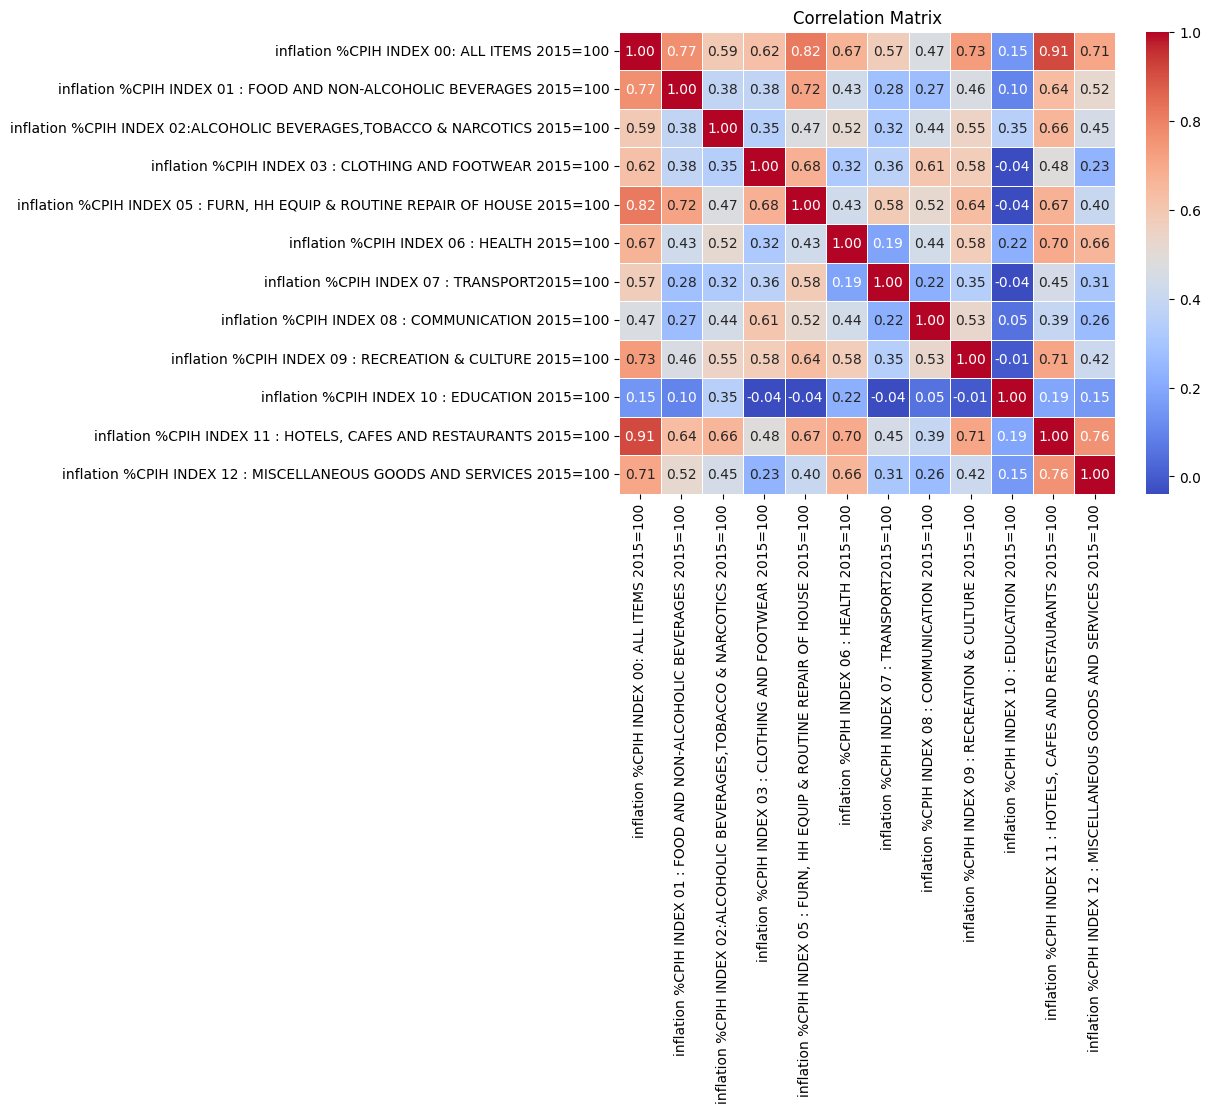

In [9]:
# Calculate the correlation matrix

df_new = pd.read_csv('mm23edit2.csv')

correlation_matrix = df_new.filter(like = 'inflation').corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()